# Análise do Tamanho do Mercado de Veículos Elétricos

A análise do tamanho do mercado é um aspecto crucial da pesquisa de mercado que determina o volume potencial de vendas em um determinado mercado.  Ajuda as empresas a compreender a magnitude da procura, avaliar os níveis de saturação do mercado e identificar oportunidades de crescimento.

### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Carregando e limpando os dados

In [2]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
ev_data.dropna(inplace=True)

### Adoção de veículos elétricos ao longo do tempo

Para ter uma ideia de como a quantidade de veículos elétricos cresceu durante os anos.

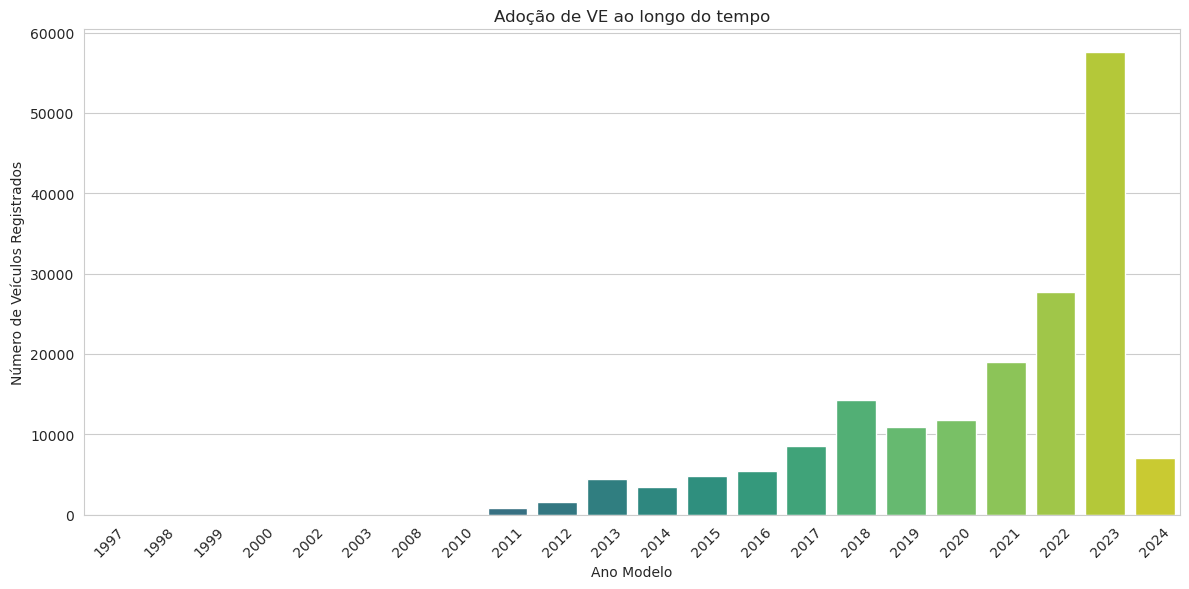

In [7]:
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title('Adoção de VE ao longo do tempo')
plt.xlabel('Ano Modelo')
plt.ylabel('Número de Veículos Registrados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A partir do gráfico de barras acima, fica claro que a adoção de VE tem aumentado ao longo do tempo, especialmente observando uma tendência ascendente significativa a partir de 2016.

O número de veículos registrados cresce modestamente até esse ponto e depois começa a aumentar rapidamente a partir de 2017.

O ano de 2023 mostra um aumento particularmente acentuado no número de VE registrados, com a barra para 2023 a ser a mais alta do gráfico, indicando um pico na adoção de VE.

### Distribuição Geográfica

In [8]:
# Distribuição geográfica a nível de condado
ev_county_distribuition = ev_data['County'].value_counts()
top_counties = ev_county_distribuition.head(3).index

In [9]:
# Filtrando o conjunto de dados para os 3 condados com mais veículos
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

In [10]:
# Analisando a distribuição dos VEs dentro da cidades destes top 3 condados
ev_city_distribuition_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [11]:
# Visualize as 10 principais cidades desses condados
top_cities = ev_city_distribuition_top_counties.head(10)

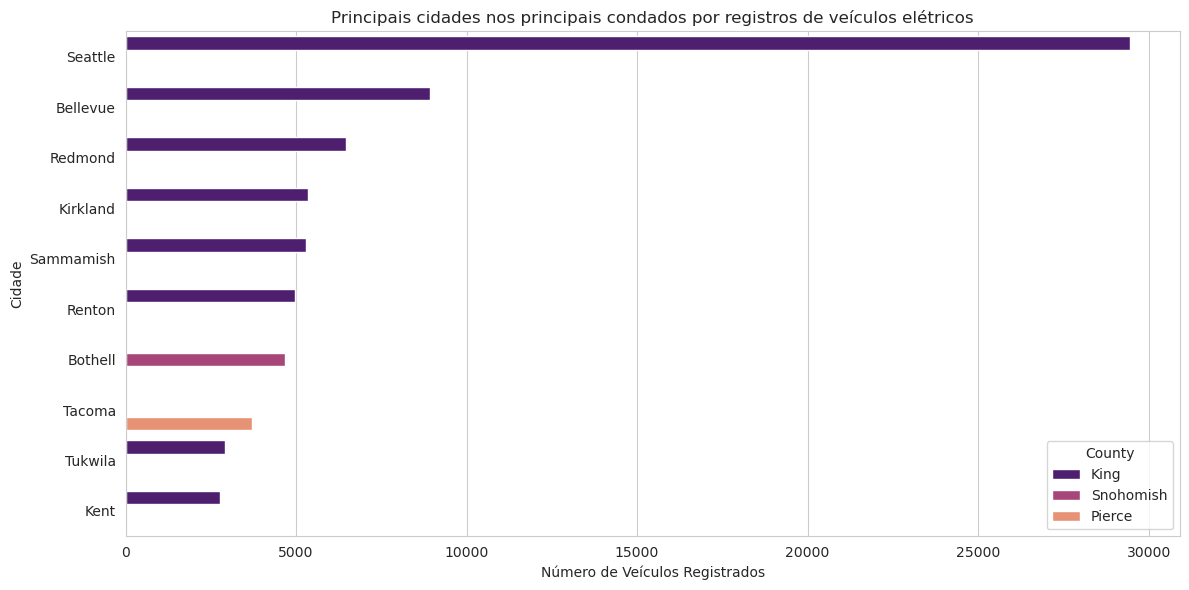

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette='magma')
plt.title('Principais cidades nos principais condados por registros de veículos elétricos')
plt.xlabel('Número de Veículos Registrados')
plt.ylabel('Cidade')
plt.legend(title='County')
plt.tight_layout()
plt.show()

O gráfico acima compara o número de veículos elétricos registrados em várias cidades de três condados: *King, Snohomish e Pierce*. As barras horizontais representam cidades e seu comprimento corresponde ao número de veículos matriculados, codificados por cores por condado.

### Tipos de Veículos Elétricos

Compreender a divisão entre diferentes tipos de veículos elétricos, como veículos elétricos a bateria (BEV) e veículos elétricos híbridos plug-in (PHEV), pode fornecer informações sobre as preferências do consumidor e os padrões de adoção de soluções elétricas puramente elétricas versus soluções elétricas híbridas.

In [13]:
# Analisando a distribuição de tipos de veículos elétricos
ev_type_distribuition = ev_data['Electric Vehicle Type'].value_counts()

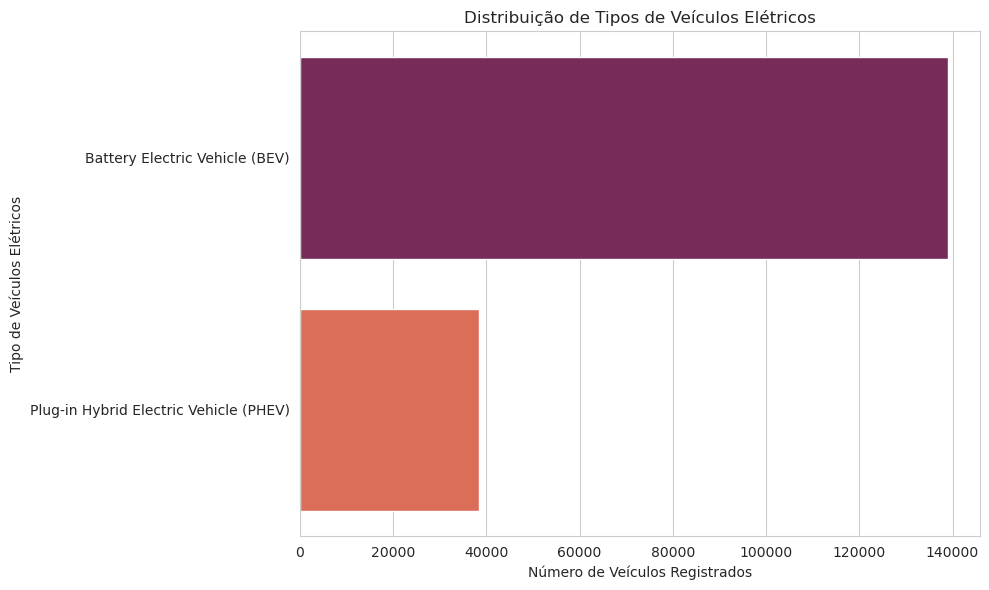

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribuition.values, y=ev_type_distribuition.index, palette='rocket')
plt.title('Distribuição de Tipos de Veículos Elétricos')
plt.xlabel('Número de Veículos Registrados')
plt.ylabel('Tipo de Veículos Elétricos')
plt.tight_layout()
plt.show()

O gráfico acima mostra que os BEVs são mais populares ou preferidos aos PHEVs entre os veículos elétricos registrados nos Estados Unidos.

### Popularidade de Marca e Modelo

A próxima análise será concentrada na popularidade dos fabricantes e modelos de veículos elétricos entre os veículos registrados.

Esta análise nos ajudará a identificar quais os fabricantes e modelos específicos que dominam o mercado de VE, indicando potencialmente as preferências dos consumidores, a fidelidade à marca e o sucesso das estratégias de vários fabricantes na promoção da mobilidade elétrica.

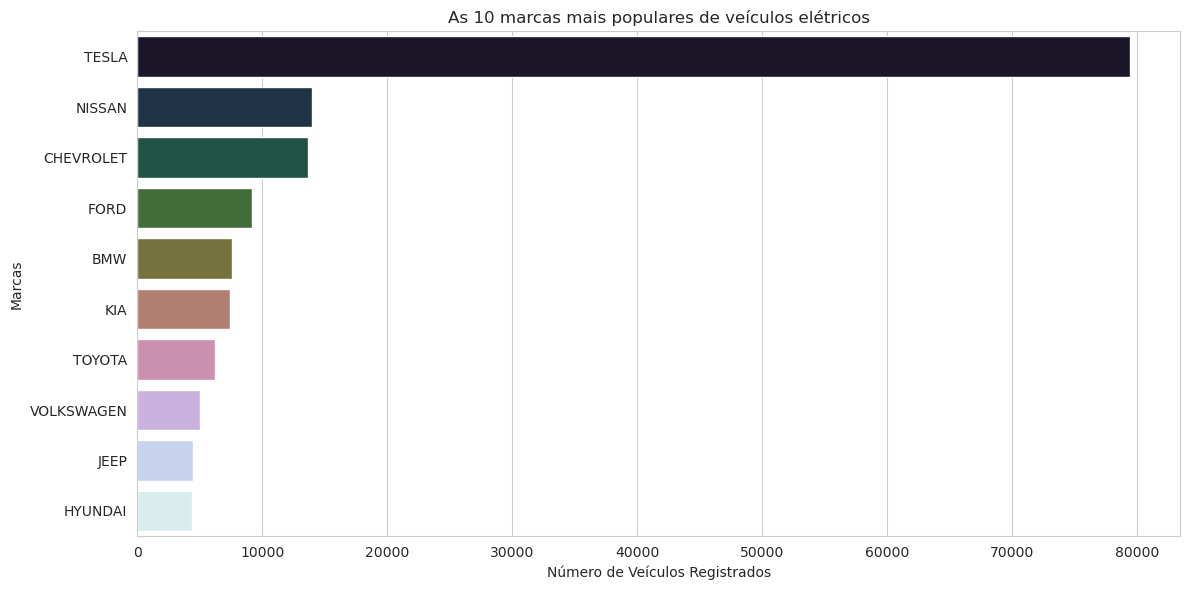

In [15]:
# Analisando a popularidade dos fabricantes de VE's
ev_make_distribuition = ev_data['Make'].value_counts().head(10)  # Limitando aos 10 primeiros para maior clareza

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribuition, y=ev_make_distribuition.index, palette='cubehelix')
plt.title('As 10 marcas mais populares de veículos elétricos')
plt.xlabel('Número de Veículos Registrados')
plt.ylabel('Marcas')
plt.tight_layout()
plt.show()

Podemos observar que:

- A **TESLA** lidera por uma margem substancial com o maior número de veículos registados.
- A **NISSAN** é o segundo fabricante mais popular, seguida pela **CHEVROLET**, embora ambas tenham significativamente menos registos do que a **TESLA**.
- **FORD**, **BMW**, **KIA**, **TOYOTA**, **VOLKSWAGEN**, **JEEP** e **HYUNDAI** seguem em ordem decrescente do número de veículos cadastrados.

Vamos nos aprofundar nos modelos mais populares desses principais fabricantes para obter um
entendimento mais detalhado das preferências do consumidor no nível do modelo.

In [16]:
# Selecionando os 3 principais fabricantes com base no número de veículos registrados
top3_makes = ev_make_distribuition.head(3).index

In [17]:
# Filtrando o conjunto de dados para esses principais fabricantes
top_makes_data = ev_data[ev_data['Make'].isin(top3_makes)]

In [18]:
# Analisando a popularidade dos modelos VE's entre esses principais fabricantes
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [19]:
# Visualizando os 10 principais modelos desses fabricantes para maior clareza
top_models = ev_model_distribution_top_makes.head(10)

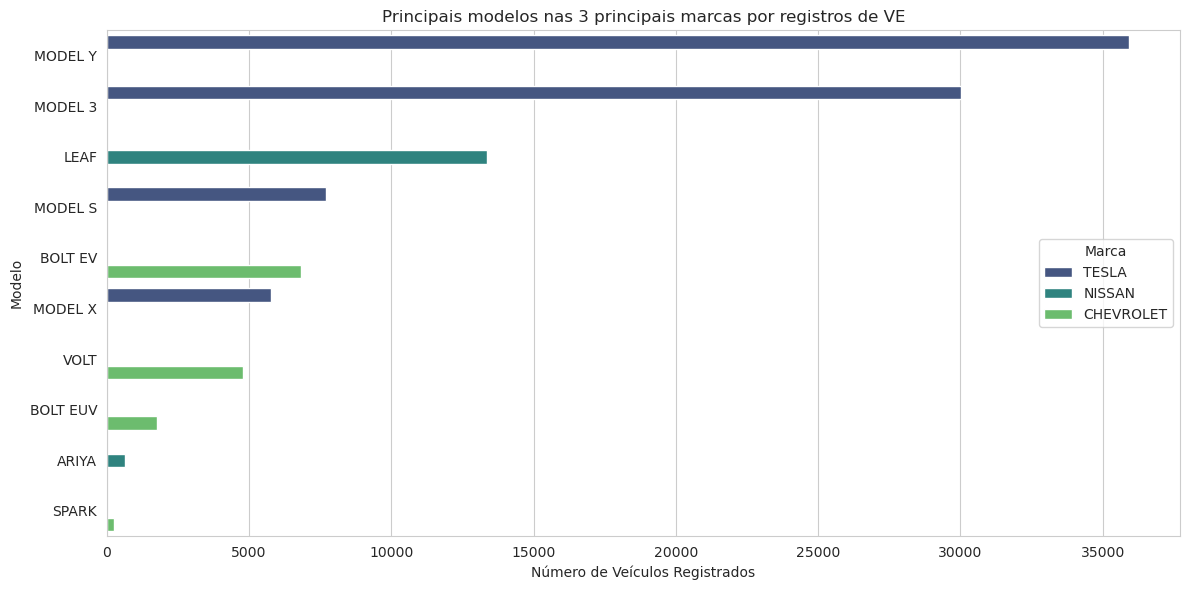

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette='viridis')
plt.title('Principais modelos nas 3 principais marcas por registros de VE')
plt.xlabel('Número de Veículos Registrados')
plt.ylabel('Modelo')
plt.legend(title='Marca', loc='center right')
plt.tight_layout()
plt.show()

O gráfico acima mostra a distribuição dos registros de veículos elétricos entre os diferentes modelos dos três principais fabricantes: **TESLA**, **NISSAN** e **CHEVROLET**.

### Análise de Autonomia Elétrica

Vamo explorar a autonomia elétrica dos veículos, que é um fator crítico para analisar o tamanho do mercado de veículos elétricos. A autonomia elétrica indica a distância que um veículo elétrico pode percorrer com uma única carga, e os avanços na tecnologia de baterias têm aumentado constantemente essas autonomias ao longo dos anos.

/home/hccruz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


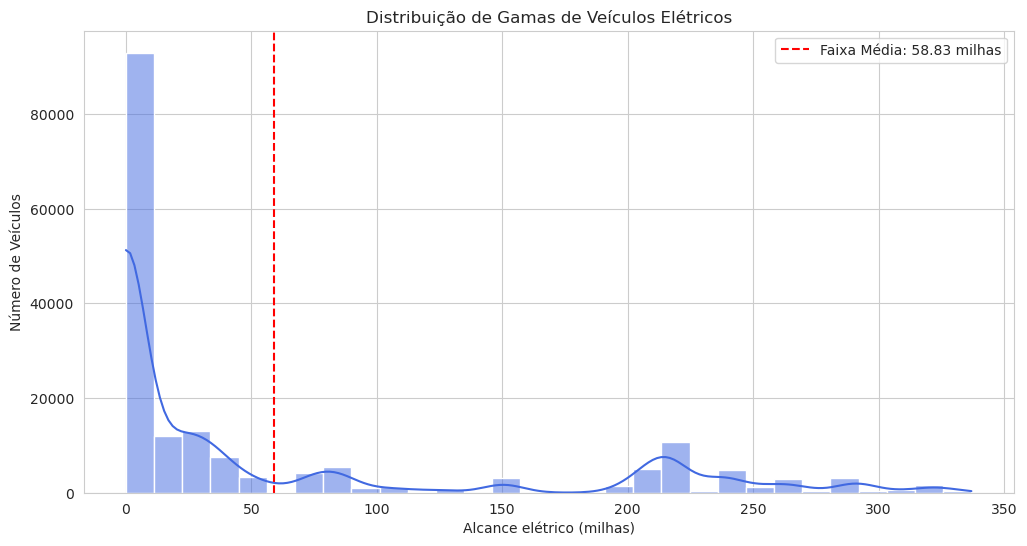

In [21]:
# Analisando a distribuição da autonomia elétrica
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribuição de Gamas de Veículos Elétricos')
plt.xlabel('Alcance elétrico (milhas)')
plt.ylabel('Número de Veículos')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--',
            label=f'Faixa Média: {ev_data["Electric Range"].mean():.2f} milhas')
plt.legend()
plt.show()

O gráfico sugere que, embora existam VEs disponíveis com autonomia elétrica elevada, a autonomia média é distorcida para baixo devido a um número substancial de veículos com autonomias mais curtas.

Agora, vamos nos aprofundar na tendência das autonomias elétricas ao longo dos anos de modelo, o que pode fornecer insights sobre como os avanços na tecnologia de baterias e no design dos veículos influenciaram as capacidades de autonomia elétrica dos veículos elétricos ao longo do tempo. Uma tendência positiva nesta análise indicaria melhorias contínuas, oferecendo aos consumidores VE com autonomias de condução mais longas e potencialmente abordando uma das principais preocupações relativas ao mercado de veículos elétricos.

In [22]:
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

/home/hccruz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hccruz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


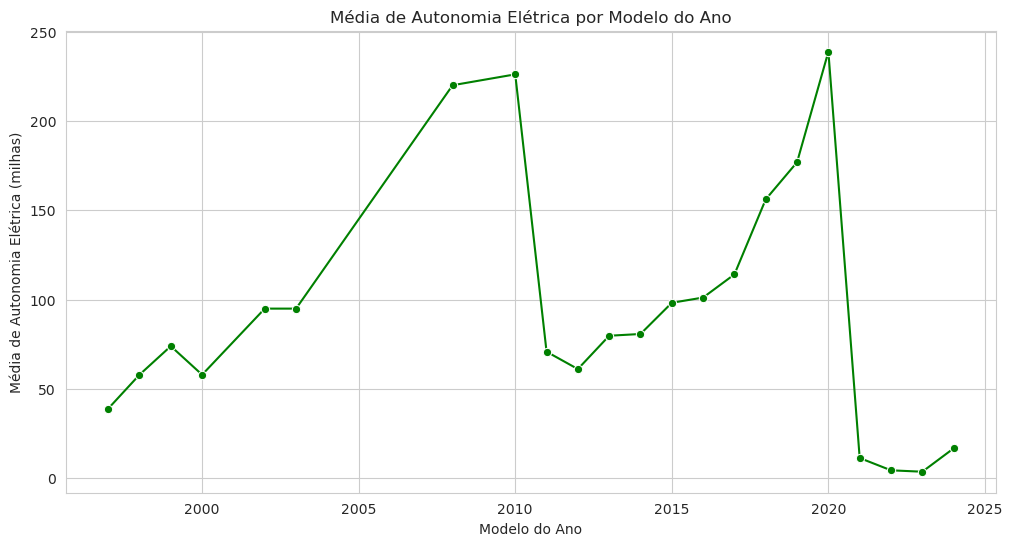

In [23]:
# Calculando a autonomia elétrica média por ano modelo
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Média de Autonomia Elétrica por Modelo do Ano')
plt.xlabel('Modelo do Ano')
plt.ylabel('Média de Autonomia Elétrica (milhas)')
plt.grid(True)
plt.show()

Os dados sugerem que, embora tenha havido flutuações, a tendência geral ao longo das últimas duas décadas tem sido no sentido de aumentar a autonomia elétrica dos veículos elétricos.

Vamos explorar como as gamas elétricas variam entre os principais fabricantes e modelos. Esta análise pode revelar como diferentes fabricantes estão a abordar o aspecto crucial da autonomia eléctrica e destacar quais os modelos que se destacam pelas suas capacidades de autonomia superiores.

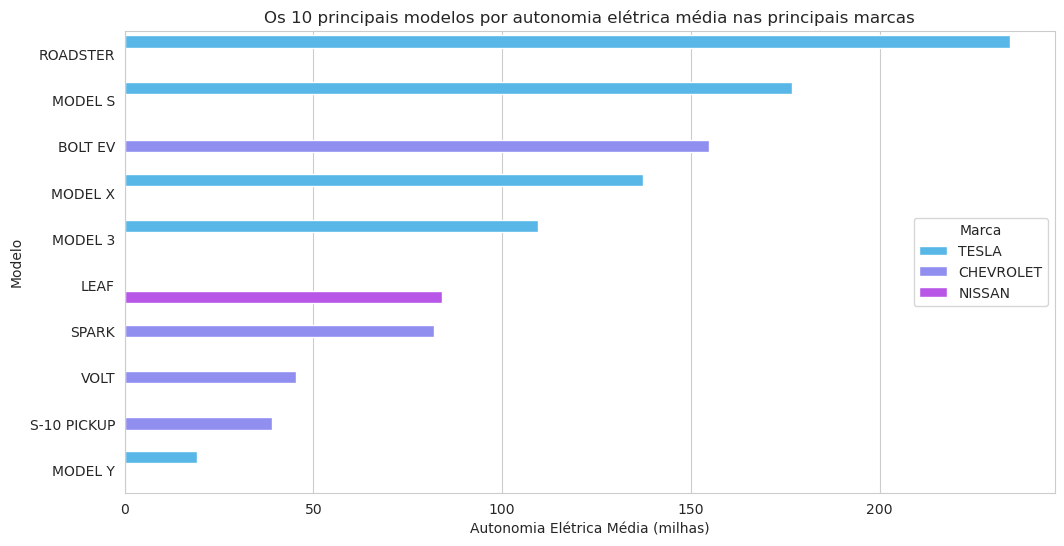

In [24]:
average_range_by_model = top_makes_data.groupby(['Model', 'Make'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# Os 10 principais modelos com maior autonomia elétrica média
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette='cool')
plt.title('Os 10 principais modelos por autonomia elétrica média nas principais marcas')
plt.xlabel('Autonomia Elétrica Média (milhas)')
plt.ylabel('Modelo')
plt.legend(title='Marca', loc='center right')
plt.show()

### Crescimento Estimado no Tamanho do Mercado

In [25]:
# Calcular o número de VEs registrados a cada ano
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

Para prever o número total de VEs que deverão ser registados em 2024, podemos utilizar uma abordagem baseada na taxa de crescimento de anos completos anteriores.

Calcularemos a Taxa Composta de Crescimento Anual (CAGR) entre um ano recente com dados completos (2023) e um ano anterior para projetar os números de 2024. Além disso, utilizando esta taxa de crescimento, podemos estimar o tamanho do mercado para os próximos cinco anos.

In [26]:
# Filtre o conjunto de dados para incluir anos com dados completos, assumindo que 2023 é o último ano completo
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

In [27]:
# Defina uma função para crescimento exponencial para ajustar os dados
def exp_growth(x, a ,b):
    return a * np.exp(b * x)

In [28]:
# Preparar os dados para ajuste de curva
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

In [29]:
# Ajustar os dados à função de crescimento exponencial
params, covariance = curve_fit(exp_growth, x_data, y_data)

In [30]:
# Use a função ajustada para prever o número de VEs para 2024 e os próximos cinco anos
previsoes_5anos = np.arange(2024, 2024 + 6) - filtered_years.index.min()
previsoes_valores = exp_growth(previsoes_5anos, *params)

In [31]:
# Crie um dicionário para exibir os valores previstos para facilitar a interpretação
previstos_ves = dict(zip(previsoes_5anos + filtered_years.index.min(), previsoes_valores))

print(previstos_ves)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


Traçar os dados estimados do tamanho do mercado

In [42]:
# Preparar dados para plotagem
anos_atuais = filtered_years.index
previsao_ano_completo = np.arange(2024, 2029 + 1)

In [43]:
# Valores reais e previstos
valores_atuais = filtered_years.values
previsao_valores_completo = [previstos_ves[year] for year in previsao_ano_completo]


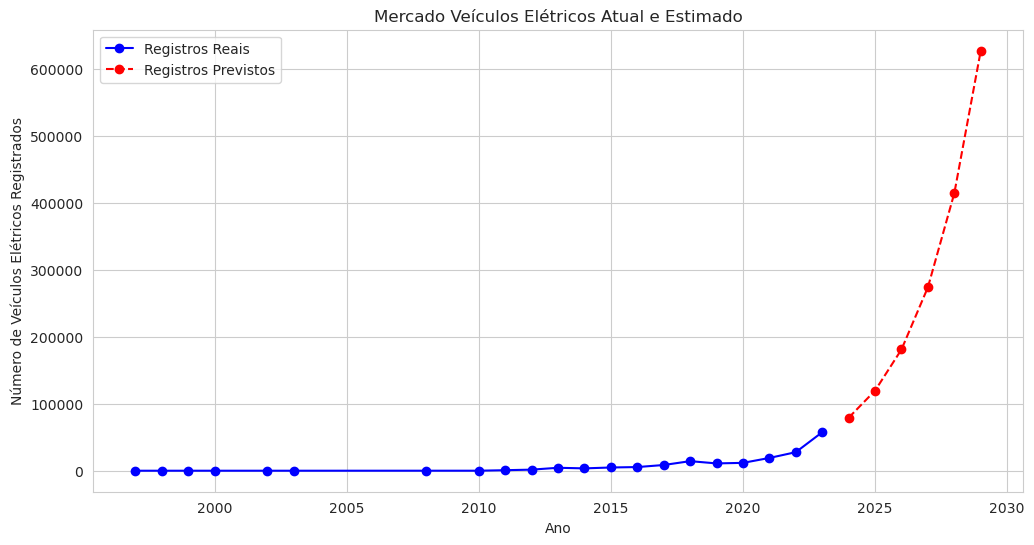

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(anos_atuais, valores_atuais, 'bo-', label='Registros Reais')
plt.plot(previsao_ano_completo, previsao_valores_completo, 'ro--', label='Registros Previstos')

plt.title('Mercado Veículos Elétricos Atual e Estimado')
plt.xlabel('Ano')
plt.ylabel('Número de Veículos Elétricos Registrados')
plt.legend()
plt.grid(True)

plt.show()

Dada a tendência crescente nos registos reais de **veículos elétricos** e a aceleração projetada de acordo com os dados de previsão, podemos concluir que o tamanho do mercado de **veículos elétricos** deverá expandir-se consideravelmente.

O aumento acentuado nos registos previstos sugere que a adopção de **veículos elétricos** pelos consumidores está a aumentar, e esta tendência deverá continuar.

Globalmente, os dados apontam para um futuro promissor para a indústria dos **veículos elétricos**, indicando uma mudança significativa nas preferências dos consumidores e um potencial aumento no investimento relacionado e nas oportunidades de negócio.

Projeto retirado do artigo feito por: **Aman Kharwal**

Localizado em: <https://thecleverprogrammer.com/2024/03/18/electric-vehicles-market-size-analysis-using-python/>